## 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define UserSim:
def UserSim(n, lam):
    return list(np.random.exponential(1.0/lam, size=n))

### 1 (a)

In [3]:
def funnel_viz(n, lam, bin_start = 0.0, bin_end = 3.0, stops = 13):
    users = UserSim(n, lam)
    hist = np.histogram(users, bins = list(np.linspace(bin_start, bin_end, num = stops, endpoint = True)))
    funnel = [1000]
    accum = 0
    for num in hist[0]:
        accum = accum+num
        funnel.append(1000-accum)
    plt.bar(x = list(hist[1]),height = funnel, width = 0.22)
    plt.title('Funnel Simulation with lambda = {}'.format(lam))
    plt.xlabel('Time (s)')
    plt.ylabel('Number of People staying in the funnel')
    plt.show()

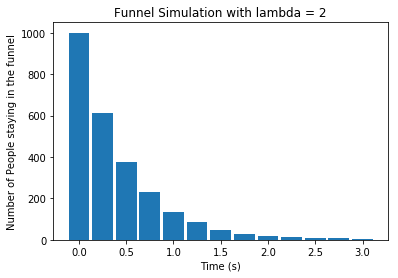

In [4]:
funnel_viz(1000, 2, bin_start = 0.0, bin_end = 3.0, stops = 13)

### 1 (b)

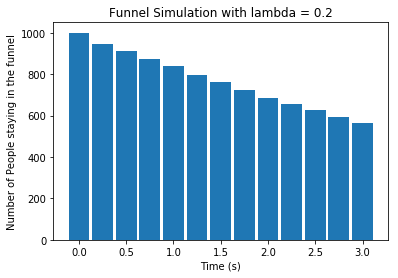

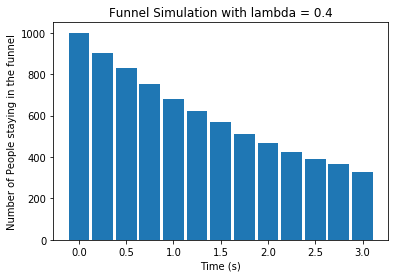

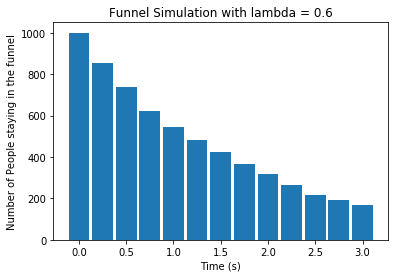

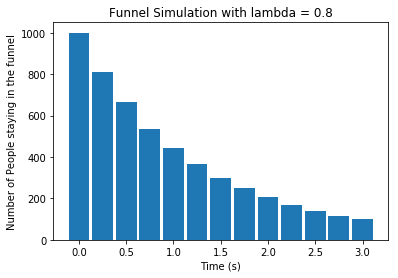

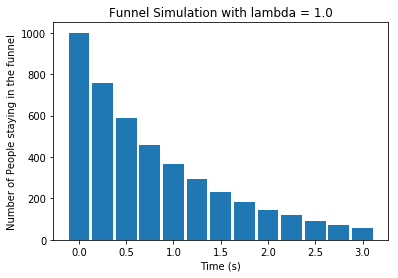

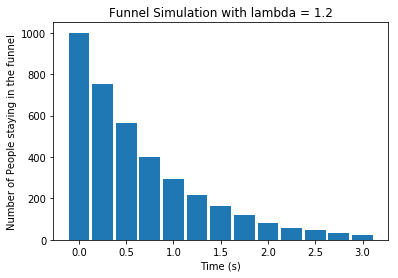

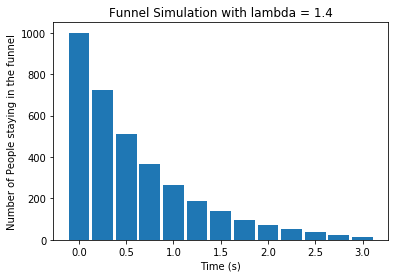

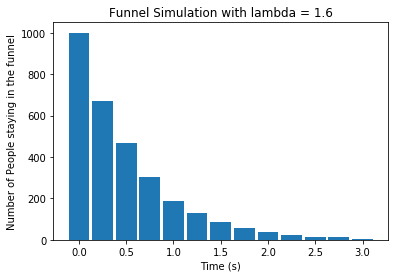

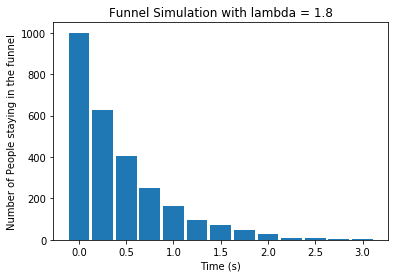

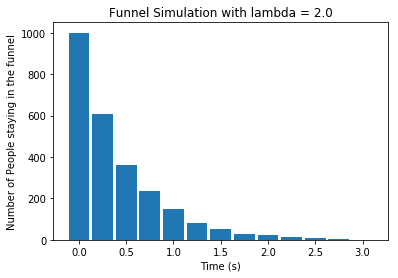

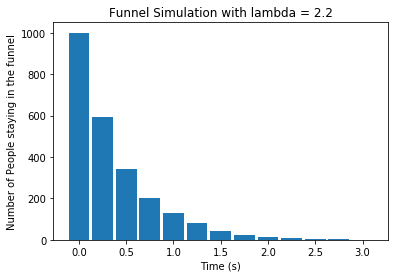

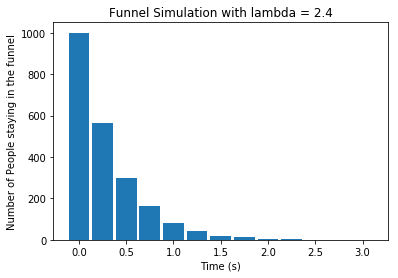

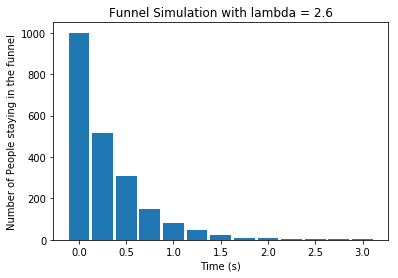

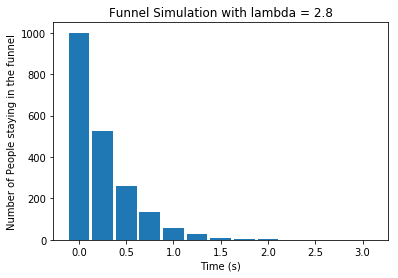

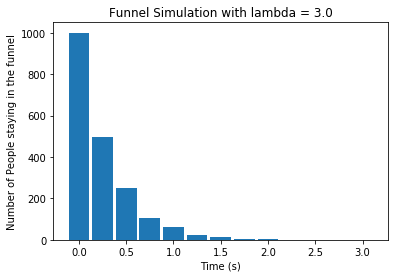

In [5]:
for i in np.arange(0.2, 3.2, 0.2):
    funnel_viz(1000, i, bin_start = 0.0, bin_end = 3.0, stops = 13)

### 1 (c)

Survival time -- 

The larger the ${\lambda}$, the shorter the survival time. 

### 2 (a)

It means that the expected value of the estimated lambda is equal to the real lambda.

### 2 (b)

In [6]:
def EstLam1(users):
    return 1.0/np.mean(users)

In [8]:
np.random.seed(42)
users = UserSim(1000, 1)
print 'The estimated lambda is: %s' % EstLam1(users)

The estimated lambda is: 1.02827134589


### 2 (c)

In [13]:
def bootstraps_lambda(users, n=500, CI=0.95):
    estimates = []
    for i in range(n):
        sampled_users = np.random.choice(users, len(users))
        estimates.append(EstLam1(sampled_users))
    return (np.percentile(estimates, ((1-CI)/2)*100),
            np.percentile(estimates, (1-(1-CI)/2)*100),
           EstLam1(users))

In [14]:
np.random.seed(42)
lower, upper, estimate = bootstraps_lambda(users, n=500, CI=0.95)

In [15]:
print 'The 95% confidence interval of lambda is ({}, {})'.format(lower, upper)

The 95% confidence interval of lambda is (0.974116009072, 1.09651864787)


### 2 (d)

In [16]:
np.random.seed(42)
num_users = [100, 200, 500, 1000, 2000, 5000, 10000]
estimated_lambda = []
CI_lower = []
CI_upper = []
for j in num_users:
    users = UserSim(j, 1)
    lower, upper, estimate = bootstraps_lambda(users, n=500, CI=0.95)
    estimated_lambda.append(estimate)
    CI_lower.append(lower)
    CI_upper.append(upper)    

In [17]:
table_2_4 = pd.DataFrame({'Number of Users':num_users, 'Estimated Lambda':estimated_lambda, 'Lower CI':CI_lower, 'Upper CI':CI_upper})
table_2_4 = table_2_4[['Number of Users','Estimated Lambda','Lower CI','Upper CI']]

In [19]:
# Table for this question
print table_2_4

   Number of Users  Estimated Lambda  Lower CI  Upper CI
0              100          1.093197  0.917018  1.342979
1              200          1.090975  0.958165  1.241005
2              500          0.877676  0.804407  0.966760
3             1000          1.013291  0.951562  1.078887
4             2000          1.008581  0.965272  1.052464
5             5000          1.036816  1.011355  1.067836
6            10000          1.005174  0.984134  1.025339


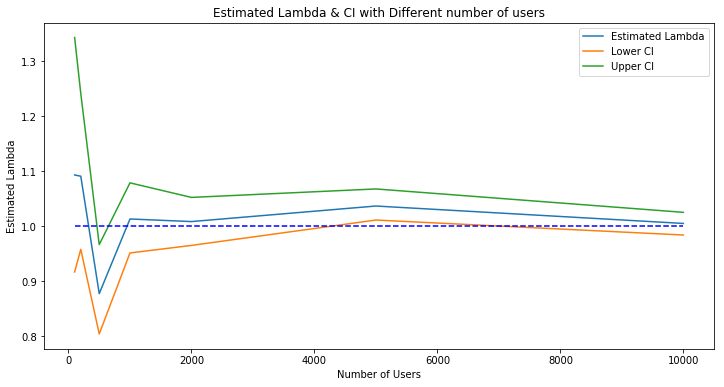

In [20]:
plt.figure(figsize=(12,6))
plt.plot('Number of Users', 'Estimated Lambda', data = table_2_4)
plt.plot('Number of Users', 'Lower CI', data = table_2_4)
plt.plot('Number of Users', 'Upper CI', data = table_2_4,)
plt.plot(num_users, np.ones(len(num_users)), 'b--')
plt.legend()
plt.title('Estimated Lambda & CI with Different number of users')
plt.xlabel('Number of Users')
plt.ylabel('Estimated Lambda')
plt.show()

### 4
#### Define 3 functions:

In [21]:
def HurdleFun(x, breaks):
    simulated_users = np.array(x)
    records = []
    for i in range(len(breaks)):
        if i == len(breaks)-1:   # append the last break
            records.append(simulated_users[simulated_users > breaks[i]])
        else:     # append in between breaks
            records.append(simulated_users[(simulated_users > breaks[i]) & (simulated_users <= breaks[i+1])])
    # insert the first break
    records.insert(0, simulated_users[simulated_users <= breaks[0]] )
    counts = [len(l) for l in records]
    return counts    

In [22]:
np.random.seed(42)
simulated_users = [0.2, 0.4]
hurdles = [0.25, 0.5]
print HurdleFun(simulated_users, hurdles)

[1, 1, 0]


In [23]:
def EstLam2(hurdle_output, breaks):
    hurdle_output = np.array(hurdle_output)
    m0 = hurdle_output[0]
    m2 = hurdle_output[-1]
    def loglike(lam):
        loglike = m0*np.log(1-np.exp(-lam*breaks[0])) - m2*lam*breaks[-1]    
        if len(breaks) > 1:                       # deal with middle terms
            for i in range(0, len(breaks)-1):
                loglike = loglike + np.log(np.exp(-lam*breaks[i]) - np.exp(-lam*breaks[i+1]))
        return loglike
    return loglike

In [24]:
x = [.25, .45, .75]
breaks = [.5]
PRT = EstLam2(HurdleFun(x, breaks), breaks)
print PRT(1)

-2.36550425913


In [25]:
def MaxMLE(hurdle_output, breaks, lam_list):
    max_log = -100000
    best_lam = 0
    for i in lam_list:
        PRT = EstLam2(hurdle_output, breaks)
        loglike= PRT(i)
        if loglike > max_log:
            max_log = loglike
            best_lam = i
    return best_lam

In [26]:
x = [.25, .45, .75]
breaks = [.5]
print MaxMLE(HurdleFun(x, breaks), breaks, list(np.arange(0.1,3,0.05)))

2.2


### 4 (a)
**assume that the lambda is 2 when generating the simulated users **

#### Simulation with [0.25, 0.75]

In [34]:
breaks = [0.25, 0.75]
np.random.seed(42)
lam_diff = []
for i in range(1000):
    users = UserSim(n=100, lam = 2)
    lam1 = EstLam1(users)   
    lam2 = MaxMLE(HurdleFun(users, breaks), breaks = breaks, lam_list = list(np.arange(0.1,4,0.01)))
    lam_diff.append(lam1-lam2)

In [36]:
print 'The average difference for breaks = %s is %s' % (breaks, np.mean(lam_diff))

The average difference for breaks = [0.25, 0.75] is 0.119473459943


#### Simulation with [0.25, 3]

In [37]:
breaks = [0.25, 3]
np.random.seed(42)
lam_diff = []
for i in range(1000):
    users = UserSim(n=100, lam = 2)
    lam1 = EstLam1(users)   
    lam2 = MaxMLE(HurdleFun(users, breaks), breaks = breaks, lam_list = list(np.arange(0.1,4,0.01)))
    lam_diff.append(lam1-lam2)

In [38]:
print 'The average difference for breaks = %s is %s' % (breaks, np.mean(lam_diff))

The average difference for breaks = [0.25, 3] is -1.95211654006


#### Simulation with [0.25, 10]

In [40]:
breaks = [0.25, 10]
np.random.seed(42)
lam_diff = []
for i in range(1000):
    users = UserSim(n=100, lam = 2)
    lam1 = EstLam1(users)   
    lam2 = MaxMLE(HurdleFun(users, breaks), breaks = breaks, lam_list = list(np.arange(0.1,4,0.01)))
    lam_diff.append(lam1-lam2)

In [41]:
print 'The average difference for breaks = %s is %s' % (breaks, np.mean(lam_diff))

The average difference for breaks = [0.25, 10] is -1.96226654006


The estimated lambda resulted from EstLam1 does not vary much since it is the mean of the simulated users, thus the variance in the average difference is much due to the estimated lambda resulted from EstLam2.

The further away the second breakpoint from the first breakpoint, the less likely that it would caputure any user that could reach that breakpoint, hence less accurate the estimated lambda would be as indicated by the greater average difference.